<a href="https://colab.research.google.com/github/krzyzan/jupyter/blob/master/proto1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Download data

import numpy as np
import pandas as pd

url = "https://stooq.pl/q/d/l/?s=fw20&i=d"
names = ['date','open','high','low','close','vol','lop']
data = pd.read_csv(url, header=0, names=names)

# Dimensions of dataset
num_samples = data.shape[0]
num_columns = data.shape[1]
print(num_samples)

5368


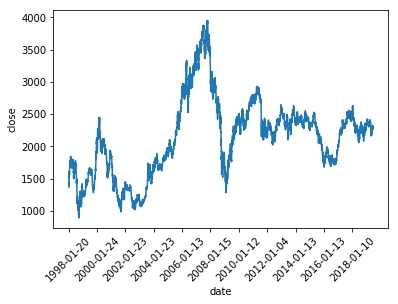

In [2]:
# Plot price chart

import matplotlib.pyplot as plt
plt.plot(data['close'])
plt.xlabel('date')
plt.ylabel('close')
plt.xticks(np.arange(data['date'].shape[0])[::500], data['date'][::500], rotation=45)
plt.show()

In [0]:
# Convert to numpy array
data = data.values

In [0]:
# Prepare and normalize data
from sklearn.preprocessing import MinMaxScaler

X = []
y = []
n = 100
for i in range(n+1, num_samples):
    X.append(data[i-1-n:i-1, 4]/data[i-1, 4]-1)
    y.append(data[i:i+1, 4]/data[i-1, 4]-1)

scaler_x = MinMaxScaler(feature_range=(-1,1))
X = np.array(X, "float32").reshape(len(X), n)
X = scaler_x.fit_transform(X)

scaler_y = MinMaxScaler(feature_range=(-1,1))
y = np.array(y, "float32").reshape(len(y), 1)
y = scaler_y.fit_transform(y)

#X = np.reshape(X, (X.shape[0], X.shape[1], 1))


In [0]:
# Split data to train and test
#from sklearn.model_selection import train_test_split

train_start = 0
train_end = int(np.floor(0.8*num_samples))-n-1
test_start = train_end
test_end = num_samples-n-1
X_train = X[np.arange(train_start, train_end), :]
y_train = y[np.arange(train_start, train_end)]
X_test = X[np.arange(test_start, test_end), :]
y_test = y[np.arange(test_start, test_end)]

In [7]:
from __future__ import absolute_import, division, print_function

# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

print(tf.__version__)

1.14.0


In [0]:
model = keras.Sequential()
model.add(keras.layers.Dense(64, activation='tanh', input_dim=n))
model.add(keras.layers.Dense(16, activation='tanh'))
model.add(keras.layers.Dense(1, activation='linear'))
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=10000, verbose=1, validation_data=(X_test, y_test))


Train on 4193 samples, validate on 1074 samples
Epoch 1/10000
4193/4193 [==============================] - 0s 88us/sample - loss: 0.0423 - acc: 0.0000e+00 - val_loss: 0.0116 - val_acc: 0.0000e+00
Epoch 2/10000
4193/4193 [==============================] - 0s 60us/sample - loss: 0.0293 - acc: 0.0000e+00 - val_loss: 0.0136 - val_acc: 0.0000e+00
Epoch 3/10000
4193/4193 [==============================] - 0s 60us/sample - loss: 0.0306 - acc: 0.0000e+00 - val_loss: 0.0122 - val_acc: 0.0000e+00
Epoch 4/10000
4193/4193 [==============================] - 0s 63us/sample - loss: 0.0274 - acc: 0.0000e+00 - val_loss: 0.0111 - val_acc: 0.0000e+00
Epoch 5/10000
4193/4193 [==============================] - 0s 54us/sample - loss: 0.0274 - acc: 0.0000e+00 - val_loss: 0.0116 - val_acc: 0.0000e+00
Epoch 6/10000
4193/4193 [==============================] - 0s 55us/sample - loss: 0.0270 - acc: 0.0000e+00 - val_loss: 0.0120 - val_acc: 0.0000e+00
Epoch 7/10000
4193/4193 [==============================] - 0s 56

In [0]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.yscale('log')
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [0]:
model.evaluate(X_test, y_test)

In [0]:
prediction = model.predict(X_test)
test = scaler_y.inverse_transform(y_test)
prediction = scaler_y.inverse_transform(prediction)

y = p = data[test_start,4]
y_chart = []
p_chart = []
for i in range(0, test_end-test_start):
    y_chart.append(y)
    p_chart.append(p)
    y = y*(test[i]+1)
    p = p*(prediction[i]+1)

plt.plot(y_chart)
plt.plot(p_chart)
plt.xticks(np.arange(data[0].shape[0])[::100], data[0][::100], rotation=45)
#plt.grid(linestyle='dotted', linewidth=1)
plt.ylabel('close')
plt.legend(['actual', 'prediction'], loc='upper left')
plt.show()